Reinforcement Learning Agent Code (Q-Learning)

In [1]:
import numpy as np
import pandas as pd

# Simple Q-Learning Agent for Business Optimization
class BusinessRLAgent:
    def __init__(self, n_actions=5):
        self.n_actions = n_actions
        self.q_table = {}
        self.learning_rate = 0.1
        self.discount_factor = 0.95
        self.epsilon = 0.1

    def get_state_key(self, state):
        return str(state)

    def get_action(self, state):
        state_key = self.get_state_key(state)
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.n_actions)

        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        else:
            return np.argmax(self.q_table[state_key])

    def update(self, state, action, reward, next_state):
        state_key = self.get_state_key(state)
        next_state_key = self.get_state_key(next_state)

        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.n_actions)
        if next_state_key not in self.q_table:
            self.q_table[next_state_key] = np.zeros(self.n_actions)

        current_q = self.q_table[state_key][action]
        max_next_q = np.max(self.q_table[next_state_key])
        new_q = current_q + self.learning_rate * (reward + self.discount_factor * max_next_q - current_q)
        self.q_table[state_key][action] = new_q


Sentiment Analysis for Customer Feedback (Optional Enhancement)

In [2]:
def analyze_review_sentiment(reviews):
    positive_keywords = ['excellent', 'great', 'good', 'quality', 'delivered', 'quick', 'affordable','subpar', 'premium']
    negative_keywords = ['poor', 'bad', 'late', 'waste', 'underwhelming', 'questionable']
    delivery_keywords = ['delivery', 'delivered', 'late', 'quick', 'handling']
    quality_keywords = ['quality', 'craftsmanship', 'design', 'detailing', 'premium']

    sentiment_analysis = {
        'positive_count': 0,
        'negative_count': 0,
        'delivery_issues': 0,
        'quality_issues': 0
    }

    for review in reviews:
        review_lower = review.lower()

        if any(kw in review_lower for kw in positive_keywords):
            sentiment_analysis['positive_count'] += 1
        if any(kw in review_lower for kw in negative_keywords):
            sentiment_analysis['negative_count'] += 1
        if any(kw in review_lower for kw in delivery_keywords) and ('late' in review_lower or 'delayed' in review_lower):
            sentiment_analysis['delivery_issues'] += 1
        if any(kw in review_lower for kw in quality_keywords) and ('poor' in review_lower or 'detailing' in review_lower):
            sentiment_analysis['quality_issues'] += 1

    return sentiment_analysis


using NLP

In [3]:
# Install Hugging Face Transformers
!pip install transformers

using distilbert

In [4]:
import pandas as pd
import re
from transformers import pipeline

# Load Feedback CSV
feedback_df = pd.read_csv('/content/feedback_augmented.csv')
feedback_df['Review'] = feedback_df['Review'].astype(str)  # Ensure string type

# Use a Lightweight Sentiment Model (distilbert-base-uncased-finetuned-sst-2-english)
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', device=0)  # If GPU is available

# Delivery and Quality Issue Regex Patterns
delivery_pattern = re.compile(r'\b(delivery|delivered|late|delay|shipping|arrival|tracking|courier|logistics|ETA|out for delivery|reschedule)\b', re.IGNORECASE)
quality_pattern = re.compile(r'\b(quality|poor|not good|detailing|cheap|bad|worth|flawless|superior)\b', re.IGNORECASE)

def analyze_review_sentiment(reviews):
    sentiment_analysis = {
        'positive_count': 0,
        'negative_count': 0,
        'delivery_issues': 0,
        'quality_issues': 0
    }

    # Run Sentiment Analysis in Batches
    results = sentiment_pipeline(reviews, batch_size=16)

    # Vectorized Keyword Detection
    delivery_flags = feedback_df['Review'].str.contains(delivery_pattern, regex=True)
    quality_flags = feedback_df['Review'].str.contains(quality_pattern, regex=True)

    # Process Sentiment Results
    for idx, result in enumerate(results):
        label = result['label']
        if label == 'POSITIVE':
            sentiment_analysis['positive_count'] += 1
        elif label == 'NEGATIVE':
            sentiment_analysis['negative_count'] += 1

        if delivery_flags.iloc[idx]:
            sentiment_analysis['delivery_issues'] += 1
        if quality_flags.iloc[idx]:
            sentiment_analysis['quality_issues'] += 1

    return sentiment_analysis

# Prepare Reviews List
reviews = feedback_df['Review'].tolist()

# Execute Sentiment Analysis
sentiment_results = analyze_review_sentiment(reviews)

print("Sentiment Analysis Summary:")
print(sentiment_results)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Sentiment Analysis Summary:
{'positive_count': 5001, 'negative_count': 2443, 'delivery_issues': 1854, 'quality_issues': 1747}


/tmp/ipython-input-849169807.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  delivery_flags = feedback_df['Review'].str.contains(delivery_pattern, regex=True)
/tmp/ipython-input-849169807.py:29: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  quality_flags = feedback_df['Review'].str.contains(quality_pattern, regex=True)


using mobilebert

In [5]:
import pandas as pd
import re
from transformers import pipeline

# Load Feedback CSV
feedback_df = pd.read_csv('/content/feedback_augmented.csv')
feedback_df['Review'] = feedback_df['Review'].astype(str)

# Load Tiny Sentiment Model (MiniLM)
#sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')
sentiment_pipeline = pipeline('sentiment-analysis', model='google/mobilebert-uncased')


# Delivery & Quality Issue Regex Patterns
delivery_pattern = re.compile(r'\b(delivery|delivered|late|delay|shipping|arrival|tracking|courier|logistics|ETA|out for delivery|reschedule)\b', re.IGNORECASE)
quality_pattern = re.compile(r'\b(quality|poor|not good|detailing|cheap|bad|worth|flawless|superior)\b', re.IGNORECASE)

def analyze_review_sentiment(reviews):
    sentiment_analysis = {
        'positive_count': 0,
        'negative_count': 0,
        'delivery_issues': 0,
        'quality_issues': 0
    }

    # Run Sentiment Analysis in Batches
    results = sentiment_pipeline(reviews, batch_size=32)  # Larger batch = faster on CPU

    # Vectorized Keyword Matching
    delivery_flags = feedback_df['Review'].str.contains(delivery_pattern, regex=True)
    quality_flags = feedback_df['Review'].str.contains(quality_pattern, regex=True)

    # Count Results
    for idx, result in enumerate(results):
        label = result['label']
        if label.upper() == 'POSITIVE':
            sentiment_analysis['positive_count'] += 1
        elif label.upper() == 'NEGATIVE':
            sentiment_analysis['negative_count'] += 1

        if delivery_flags.iloc[idx]:
            sentiment_analysis['delivery_issues'] += 1
        if quality_flags.iloc[idx]:
            sentiment_analysis['quality_issues'] += 1

    return sentiment_analysis

# Prepare Reviews List
reviews = feedback_df['Review'].tolist()

# Execute Sentiment Analysis
sentiment_results = analyze_review_sentiment(reviews)

print("Sentiment Analysis Summary:")
print(sentiment_results)


config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/147M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/147M [00:00<?, ?B/s]

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
/tmp/ipython-input-1180695952.py:30: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  delivery_flags = feedback_df['Review'].str.contains(delivery_pattern, regex=True)
/tmp/ipython-input-1180695952.py:31: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  quality_flags = feedback_df['Review'].str.contains(quality_pattern, regex=True)


Sentiment Analysis Summary:
{'positive_count': 0, 'negative_count': 0, 'delivery_issues': 1854, 'quality_issues': 1747}


In [6]:


import pandas as pd
from transformers import pipeline

# Load Feedback CSV
feedback_df = pd.read_csv('/content/feedback_augmented.csv')

# Ensure 'Review' and 'Rating' columns are present
print(feedback_df.head())

# Load HuggingFace Sentiment Analysis Pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

def analyze_review_sentiment(reviews):
    sentiment_analysis = {
        'positive_count': 0,
        'negative_count': 0,
        'delivery_issues': 0,
        'quality_issues': 0
    }

    delivery_keywords = [
        'delivery', 'delivered', 'late', 'quick', 'fast', 'express', 'on time',
        'delay', 'shipping time', 'wait time', 'processing speed', 'dispatch',
        'arrival', 'ETA', 'tracking', 'fulfillment', 'handling', 'packaging',
        'secure', 'careful', 'undamaged', 'intact', 'shipping', 'logistics',
        'courier', 'shipment', 'delivery partner', 'order status', 'out for delivery',
        'return pickup', 'waiting time', 'delivery experience', 'timely',
        'rush delivery', 'same-day', 'next-day', 'standard shipping',
        'free shipping', 'delivery fee', 'tracking update', 'missed delivery',
        'reschedule delivery'
    ]

    quality_keywords = [
        'quality', 'craftsmanship', 'design', 'detailing', 'premium', 'durable',
        'long-lasting', 'sturdy', 'well-made', 'high-end', 'luxury', 'handmade',
        'artisan', 'finish', 'texture', 'stitching', 'fabric', 'material', 'build',
        'elegant', 'sleek', 'modern', 'classic', 'stylish', 'sophisticated',
        'polished', 'refined', 'beautiful', 'attractive', 'eye-catching', 'unique',
        'exclusive', 'branded', 'signature', 'comfort', 'soft', 'smooth',
        'lightweight', 'breathable', 'ergonomic', 'functional', 'practical',
        'user-friendly', 'performance', 'reliable', 'worth it', 'value for money',
        'investment piece', 'exceeds expectations', 'top-notch', 'flawless',
        'perfect', 'premium feel', 'high-grade', 'authentic', 'trusted', 'elite',
        'superior', 'unmatched', 'benchmark', 'industry standard', 'worth','not good','not detailing'
    ]

    results = sentiment_pipeline(reviews, batch_size=8)
    print(results)
    for review, result in zip(reviews, results):
        label = result['label']

        if label == 'POSITIVE':
            sentiment_analysis['positive_count'] += 1
        elif label == 'NEGATIVE':
            sentiment_analysis['negative_count'] += 1

        review_lower = review.lower()

        # Delivery Issues detection (broad coverage)
        if any(kw in review_lower for kw in delivery_keywords):
            if 'late' in review_lower or 'delay' in review_lower or 'missed' in review_lower or 'reschedule' in review_lower:
                sentiment_analysis['delivery_issues'] += 1

        # Quality Issues detection (broader semantic check)
        if any(kw in review_lower for kw in quality_keywords):
            if any(neg_kw in review_lower for neg_kw in ['poor', 'not detailing', 'not good', 'worth', 'cheap', 'bad']):
                sentiment_analysis['quality_issues'] += 1

    return sentiment_analysis


# Run Sentiment Analysis
reviews = feedback_df['Review'].dropna().tolist()
sentiment_results = analyze_review_sentiment(reviews)

print("Sentiment Analysis Summary:")
print(sentiment_results)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


  Product Category  Rating                                             Review
0         Clothing       4   The delivery team handled the product with care.
1         Clothing       3  Had slight delays but the product was in good ...
2            Other       2                                    Waste of Money.
3            Other       3  Had slight delays but the product was in good ...
4            Other       5    Lack of delivery delays is greatly appreciated.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9950071573257446}, {'label': 'POSITIVE', 'score': 0.999764621257782}, {'label': 'NEGATIVE', 'score': 0.9997840523719788}, {'label': 'POSITIVE', 'score': 0.999764621257782}, {'label': 'POSITIVE', 'score': 0.9977287650108337}, {'label': 'NEGATIVE', 'score': 0.9995701909065247}, {'label': 'POSITIVE', 'score': 0.9991279244422913}, {'label': 'NEGATIVE', 'score': 0.9974396228790283}, {'label': 'POSITIVE', 'score': 0.9977287650108337}, {'label': 'POSITIVE', 'score': 0.9998719692230225}, {'label': 'POSITIVE', 'score': 0.9967118501663208}, {'label': 'POSITIVE', 'score': 0.9945036172866821}, {'label': 'POSITIVE', 'score': 0.9967118501663208}, {'label': 'NEGATIVE', 'score': 0.9995701909065247}, {'label': 'NEGATIVE', 'score': 0.9676812291145325}, {'label': 'POSITIVE', 'score': 0.9998723268508911}, {'label': 'NEGATIVE', 'score': 0.9995641112327576}, {'label': 'POSITIVE', 'score': 0.9950071573257446}, {'label': 'POSITIVE', 'score': 0.9998641014099121}, {'label': 'NE

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.91      0.96      1866
    POSITIVE       0.97      1.00      0.98      4454

    accuracy                           0.97      6320
   macro avg       0.98      0.96      0.97      6320
weighted avg       0.98      0.97      0.97      6320



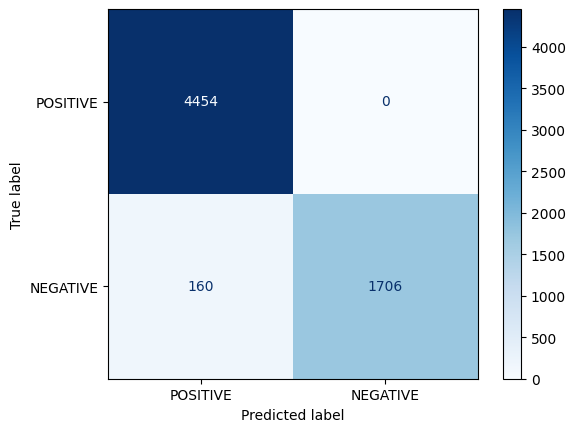

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assign true sentiment labels based on Ratings
def rating_to_sentiment(rating):
    if rating >= 4:
        return 'POSITIVE'
    elif rating <= 2:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'  # optional, skip NEUTRAL if needed

feedback_df['True_Sentiment'] = feedback_df['Rating'].apply(rating_to_sentiment)

# Run Sentiment Pipeline Predictions
pipeline_results = sentiment_pipeline(feedback_df['Review'].dropna().tolist())
predicted_labels = [res['label'] for res in pipeline_results]

# Filter only POSITIVE/NEGATIVE rows for evaluation (exclude NEUTRAL)
mask = feedback_df['True_Sentiment'] != 'NEUTRAL'
true_labels = feedback_df.loc[mask, 'True_Sentiment']
pred_labels = [pred for pred, m in zip(predicted_labels, mask) if m]

# Evaluation Metrics
print(classification_report(true_labels, pred_labels))
cm = confusion_matrix(true_labels, pred_labels, labels=['POSITIVE', 'NEGATIVE'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['POSITIVE', 'NEGATIVE'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [8]:
!pip install shap




In [9]:
import shap
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

# Load pipeline model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a prediction function
def predict(texts):
    if isinstance(texts, np.ndarray):
        texts = texts.tolist()
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    # distilbert does not accept token_type_ids
    inputs.pop("token_type_ids", None)
    with torch.no_grad():
        logits = model(**inputs).logits
    return logits

# SHAP Explainer
explainer = shap.Explainer(predict, masker=shap.maskers.Text(tokenizer))

# Select a few sample reviews to explain
sample_reviews = feedback_df['Review'].dropna().iloc[:5].tolist()
shap_values = explainer(sample_reviews)

# Visualize
shap.plots.text(shap_values)

  0%|          | 0/110 [00:00<?, ?it/s]

PartitionExplainer explainer:  20%|██        | 1/5 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer:  80%|████████  | 4/5 [00:31<00:04,  4.09s/it]

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer: 6it [00:50, 10.07s/it]


In [10]:
def generate_business_recommendations(df, feedback_data=None, steps=100):
    recommendations = {}
    agent = BusinessRLAgent()

    for product in df['Product Category'].unique():
        product_data = df[df['Product Category'] == product]

        avg_sales = product_data['Total Sales'].mean()
        sales_volatility = product_data['Total Sales'].std()
        total_revenue = product_data['Total Sales'].sum()

        feedback_analysis = {}
        if feedback_data is not None:
            product_feedback = feedback_data[feedback_data['Product Category'] == product]
            if not product_feedback.empty:
                feedback_analysis = {
                    'avg_rating': product_feedback['Rating'].mean(),
                    'total_reviews': len(product_feedback),
                    'positive_reviews': len(product_feedback[product_feedback['Rating'] >= 4]),
                    'negative_reviews': len(product_feedback[product_feedback['Rating'] <= 2]),
                    'review_sentiment': analyze_review_sentiment(product_feedback['Review'].tolist())
                }

        # RL Simulation
        scenarios = []
        for _ in range(steps):
            state = [
                int(avg_sales > product_data['Total Sales'].median()),
                int(sales_volatility > product_data['Total Sales'].std()),
                int(total_revenue > product_data['Total Sales'].sum() * 0.8)
            ]

            if feedback_analysis:
                state.extend([
                    int(feedback_analysis.get('avg_rating', 0) > 3.5),
                    int(feedback_analysis.get('positive_reviews', 0) > feedback_analysis.get('negative_reviews', 0))
                ])

            action = agent.get_action(state)
            reward = 1 if avg_sales > product_data['Total Sales'].mean() else -0.5
            if feedback_analysis:
                feedback_bonus = (feedback_analysis.get('avg_rating', 3) - 3) * 0.2
                reward += feedback_bonus

            next_state = state.copy()
            agent.update(state, action, reward, next_state)

            scenarios.append({'action': action, 'reward': reward, 'state': state})

        best_action = np.argmax([s['reward'] for s in scenarios])

        action_descriptions = {
            0: "Increase marketing budget",
            1: "Optimize pricing",
            2: "Improve inventory management",
            3: "Enhance customer service",
            4: "Expand product line"
        }

        recommendations[product] = {
            'recommended_action': action_descriptions[best_action],
            'confidence_score': np.mean([s['reward'] for s in scenarios])
        }

    return recommendations

In [15]:
import pandas as pd

# Example data load
sales_data = pd.read_csv('/content/augmented_sales_data.csv')
feedback_data = pd.read_csv('/content/feedback_augmented.csv')

# Ensure 'date' is datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')
sales_data = sales_data.dropna(subset=['Order Date'])

# Run RL Recommendation Generator
recommendations = generate_business_recommendations(sales_data, feedback_data)

# Display Recommendations
for product, rec in recommendations.items():
    print(f"Product: {product}")
    print(f"Recommended Action: {rec['recommended_action']}")
    print(f"Confidence Score: {rec['confidence_score']:.2f}")
    print("-" * 30)

[{'label': 'POSITIVE', 'score': 0.9950071573257446}, {'label': 'POSITIVE', 'score': 0.999764621257782}, {'label': 'NEGATIVE', 'score': 0.9995701909065247}, {'label': 'POSITIVE', 'score': 0.9998719692230225}, {'label': 'POSITIVE', 'score': 0.9967118501663208}, {'label': 'POSITIVE', 'score': 0.9945036172866821}, {'label': 'POSITIVE', 'score': 0.9967118501663208}, {'label': 'NEGATIVE', 'score': 0.9995701909065247}, {'label': 'POSITIVE', 'score': 0.9998723268508911}, {'label': 'POSITIVE', 'score': 0.9950071573257446}, {'label': 'NEGATIVE', 'score': 0.9916694164276123}, {'label': 'NEGATIVE', 'score': 0.9997840523719788}, {'label': 'POSITIVE', 'score': 0.9977820515632629}, {'label': 'NEGATIVE', 'score': 0.8901534676551819}, {'label': 'POSITIVE', 'score': 0.999764621257782}, {'label': 'POSITIVE', 'score': 0.9967118501663208}, {'label': 'POSITIVE', 'score': 0.9998723268508911}, {'label': 'NEGATIVE', 'score': 0.9997984766960144}, {'label': 'NEGATIVE', 'score': 0.9997974038124084}, {'label': 'PO